# Fit annual harmonics to the atlas monthly amplitude data

In [15]:
import xarray as xr
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert

from soda.utils import harmonic_analysis as ha
from soda.utils import othertime

In [23]:
%matplotlib notebook

In [2]:
frq, names = ha.getTideFreq(['SA','SSA','120d','90d'])

In [49]:
ha.harmonic_fit_array?

In [51]:
ds_all = xr.open_dataset(r'/home/suntans/cloudstor/Data/IWAtlas/NWS_internal_tide_atlas.nc',
                        )

#ds = ds_all.sel(modes=0)
ds = ds_all.sel(longitude=188.5, latitude=-16.66,  method='nearest')
ds_all

<xarray.Dataset>
Dimensions:    (depth: 100, frq: 5, latitude: 1000, longitude: 1750, modes: 4, time: 12)
Coordinates:
  * time       (time) datetime64[ns] 2013-07-01 2013-08-01 ... 2014-06-01
  * frq        (frq) float64 0.0001405 0.0001454 0.0001379 7.292e-05 6.76e-05
  * modes      (modes) float64 0.0 1.0 2.0 3.0
  * latitude   (latitude) float64 -25.0 -24.98 -24.96 ... -5.06 -5.04 -5.02
  * longitude  (longitude) float64 107.5 107.5 107.5 107.6 ... 142.4 142.5 142.5
  * depth      (depth) float64 3.734 11.46 19.44 ... 5.792e+03 5.996e+03
Data variables:
    amp_b      (time, frq, modes, latitude, longitude) float64 ...
    phs_b      (time, frq, modes, latitude, longitude) float64 ...
    z          (latitude, longitude) float64 ...
    rho        (time, depth, latitude, longitude) float64 ...
Attributes:
    Name:          North West Shelf internal tide amplitude climatology
    Date created:  2018:11:05 21:59:57
    Author:        Matt Rayson
    Institution:   University of West

<IPython.core.display.Javascript object>


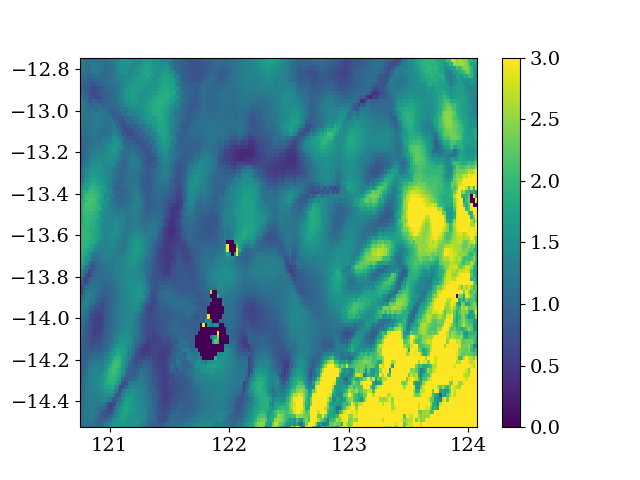

In [62]:
plt.figure()
plt.pcolormesh(ds_all.longitude, ds_all.latitude, ds_all.amp_b[:,0,0,...].std(axis=0),vmax=3)
#plt.pcolormesh(ds.longitude, ds.latitude, np.abs(amp_SA),vmax=10)
plt.colorbar()


In [43]:
ff=0
mm=0
# amp_b = ds.amp_b[:,ff,mm,:,:]
# phs_b = ds.phs_b[:,ff,mm,:,:]

amp_re = ds.amp_b[:,ff,mm,...]*np.cos(ds.phs_b[:,ff,mm,...]) 
#amp_im = amp_b*np.sin(phs_b)
amp_re.shape


(12,)

In [58]:
tsec = othertime.SecondsSince(ds.time.values)
myamp_re = ha.harmonic_fit_array(amp_re.values,tsec,frq)
myamp_re.shape

/home/suntans/code/soda/soda/utils/harmonic_analysis.py:66: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  b = np.linalg.lstsq(A,X)


(9,)

In [59]:
amp_im = ds.amp_b[:,ff,mm,...]*np.sin(ds.phs_b[:,ff,mm,...]) 
myamp_im = ha.harmonic_fit_array(amp_im.values,tsec,frq)


/home/suntans/code/soda/soda/utils/harmonic_analysis.py:66: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  b = np.linalg.lstsq(A,X)


In [60]:
myamp_re_mu = myamp_re[0,...]
myamp_re_re = myamp_re[1::2,...]
myamp_re_im = myamp_re[2::2,...]

myamp_im_mu = myamp_im[0,...]
myamp_im_re = myamp_im[1::2,...]
myamp_im_im = myamp_im[2::2,...]

In [48]:
ii = 0
amp_SA_re = myamp_re[2*ii+1,...]*np.cos(myamp_re[2*ii+2,...]) + \
    1j*(myamp_re[2*ii+1,...]*np.sin(myamp_re[2*ii+2,...]))

<IPython.core.display.Javascript object>


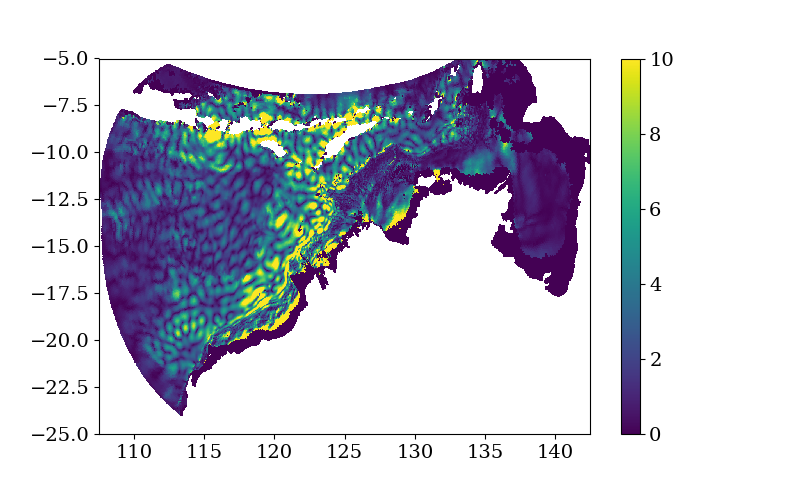

In [37]:
plt.figure()
plt.pcolormesh(ds.longitude, ds.latitude, np.abs(myamp_re[0,...]+1j*myamp_im[0,...]),vmax=10)
#plt.pcolormesh(ds.longitude, ds.latitude, np.abs(amp_SA),vmax=10)
plt.colorbar()


In [ ]:
'[ .   ]'